# Lab 2: Mine Crafting
Author: Jeremy Vo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import CubicSpline, interp1d
from scipy.integrate import quad

G = 6.6743e-11 # m^3/kg/s^2
g0 = 9.81 #m/s^2
M_e = 5.972e+24 # kg
M_m = 7.35e+22 # kg
R_e = 6378.1e+3 # m
R_m = 1738.1e+3 # m
rot_eq = 7.272e-5 # rad/s

## Part 1: The Ideal Case

Basic Free-fall equation:
\begin{equation}
    d = v_0t+\frac{1}{2}gt^2
\end{equation}

Where d is distance (m), $v_0$ is initial velocity (m/s), g is acceleration (m/s^2), and t is time (s). 

To isolate time, we do some algebraic manipulation:
\begin{aligned}
    &\frac{1}{2}gt^2 + v_0t - d = 0 \\
    &t = \frac{-v_0 \pm \sqrt{v_0^2+2gd}}{g}
\end{aligned}

Since time is positive, and the test mass will start with 0 initial velocity, the equation reduces to:
\begin{aligned}
    t &= \frac{\sqrt{2gd}}{g} \\
    t &= \sqrt{\frac{2d}{g}}
\end{aligned}

Since 4km is so close to the surface of the Earth, we can assume that $g \approx g_0$ (9.81 m/s/s) for the entire free fall duration

In [2]:
d = 4000 # m
time = np.sqrt(2*d/g0)
print(f'Free fall time: {time} seconds')

Free fall time: 28.55686245854129 seconds


---

Equation 1:
\begin{equation}
    \frac{dy^2}{dt^2} = - g - \alpha \left(\frac{dy}{dt}\right)^{\gamma}
\end{equation}

Since $v=\frac{dy}{dt}$, we can do substitution to make:
\begin{equation}
    \frac{dv}{dt} = - g - \alpha \left(v\right)^{\gamma}
\end{equation}

Meaning we have the following system of equations:
\begin{aligned}
    &\frac{dy}{dt}=v
    \\
    \\
    &\frac{dv}{dt} = - g - \alpha \left(v\right)^{\gamma}
\end{aligned}

---

Crash occurs at t = 28.556862458541275 seconds, at y = -4000.0000000000005 m


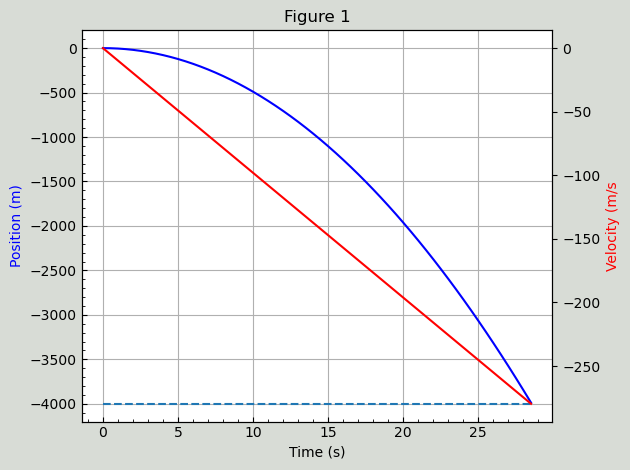

In [3]:
alpha = 0 # Assuming no drag
gamma = 2
y0 = 0 # m, surface of the earth
v0 = 0 # m/s, free fall
icon = [y0, v0]
#Depreciated function
'''
def g_pointmass_surface(r):
    u = R_e + r
    return G*M_e/u**2
'''
t0, tf = 0, 1000
t_span = np.linspace(t0, tf, 2000)

def idealmodel(t, s):
    y, v = s
    dydt = v
    dvdt = -g0 + alpha*np.abs(v)**gamma
    return [dydt, dvdt]


def difference(t, s):
    return s[0] + 4000

difference.terminal = True
# Solving
soln = solve_ivp(fun = idealmodel, t_span = (t0, tf), y0=icon, t_eval=t_span, events = difference)
tt = soln.t
y = soln.y[0]
v = soln.y[1]

fig, ax = plt.subplots()
ax.plot(tt, y, label = 'Position (m)', color = 'blue')
ax0 = ax.twinx()
ax0.plot(tt, v, label = 'Velocity (m/s)', color = 'red')
ax.set_ylabel('Position (m)', color='blue')
ax.set_xlabel('Time (s)')
ax0.set_ylabel('Velocity (m/s', color = 'red')
ax.hlines(y = -4000, xmin = 0, xmax = np.max(tt), ls = '--', label = 'Mine Floor')
ax.grid()
ax.minorticks_on() # Making it 'look nice'
ax.tick_params(axis='both', which='major', direction='in')
ax.tick_params(axis='both', which='minor', direction='in')
ax.set_title('Figure 1')
fig.set_facecolor('xkcd:light grey')
fig.tight_layout()

# Using events to calculate time at which the mass hits the bottom of the shaft
print(f'Crash occurs at t = {soln.t_events[0][0]} seconds, at y = {soln.y_events[0][0][0]} m')


 If we just assume g0, the solv_ivp solution was accurate to 7 decimal points. This accuracy is highly dependent on your linspace step size.

## Part 2:

Crash occurs at t = 28.558364479326276 seconds, at y = -3999.999999999999 m


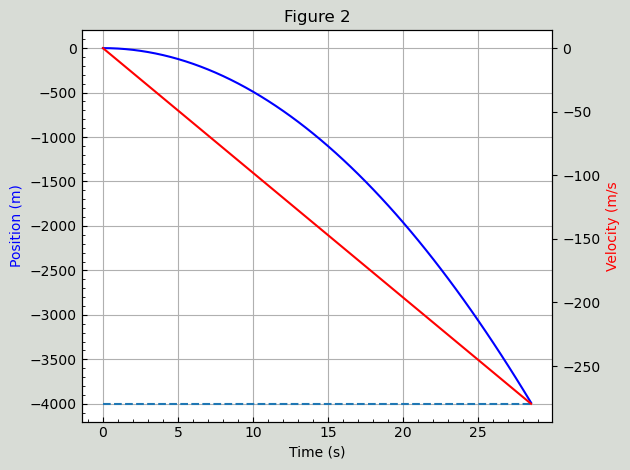

In [4]:
alpha = 0 # Assuming no drag
gamma = 2
y0 = 0 # m, surface of the earth
v0 = 0 # m/s, free fall
icon = [y0, v0]

def gr(r):
    u = g0*(r/R_e)
    return u

t0, tf = 0, 1000
t_span = np.linspace(t0, tf, 2000)

def idealmodel(t, s):
    y, v = s
    dydt = v
    dvdt = -gr(y + R_e) + alpha*np.abs(v)**gamma
    return [dydt, dvdt]


def difference(t, s):
    return s[0] + 4000

difference.terminal = True
# Solving
soln = solve_ivp(fun = idealmodel, t_span = (t0, tf), y0=icon, t_eval=t_span, events = difference)
tt = soln.t
y = soln.y[0]
v = soln.y[1]

fig, ax = plt.subplots()
ax.plot(tt, y, label = 'Position (m)', color = 'blue')
ax0 = ax.twinx()
ax0.plot(tt, v, label = 'Velocity (m/s)', color = 'red')
ax.set_ylabel('Position (m)', color='blue')
ax.set_xlabel('Time (s)')
ax0.set_ylabel('Velocity (m/s', color = 'red')
ax.hlines(y = -4000, xmin = 0, xmax = np.max(tt), ls = '--', label = 'Mine Floor')
ax.grid()
ax.minorticks_on() # Making it 'look nice'
ax.tick_params(axis='both', which='major', direction='in')
ax.tick_params(axis='both', which='minor', direction='in')
ax.set_title('Figure 2')
fig.set_facecolor('xkcd:light grey')
fig.tight_layout()

# Using events to calculate time at which the mass hits the bottom of the shaft
print(f'Crash occurs at t = {soln.t_events[0][0]} seconds, at y = {soln.y_events[0][0][0]} m')


There is almost negligible change in the crash time. The test mass reaches the floor at 28.558 seconds, whereas in our previous, constant g solution it reached the floor at 28.557 seconds. This makes sense, as g(r) decreases with decreasing distance to the center of the earth.

Crash occurs at t = 83.49323777912096 seconds, at y = -4000.0 m
-49.993547138824574


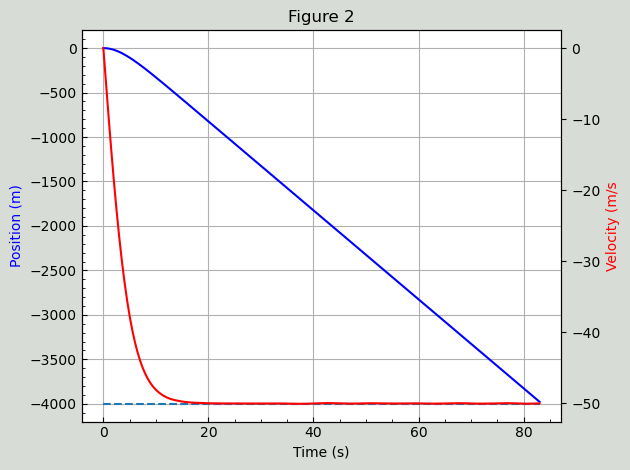

In [5]:
alpha = 0.003919 # Assuming no drag
gamma = 2
y0 = 0 # m, surface of the earth
v0 = 0 # m/s, free fall
icon = [y0, v0]

def gr(r):
    u = g0*(r/R_e)
    return u

t0, tf = 0, 1000
t_span = np.linspace(t0, tf, 2000)

def idealmodel(t, s):
    y, v = s
    dydt = v
    dvdt = -gr(y+R_e) + alpha*np.abs(v)**gamma
    return [dydt, dvdt]


def difference(t, s):
    return s[0] + 4000

difference.terminal = True
# Solving
soln = solve_ivp(fun = idealmodel, t_span = (t0, tf), y0=icon, t_eval=t_span, events = difference)
tt = soln.t
y = soln.y[0]
v = soln.y[1]

fig, ax = plt.subplots()
ax.plot(tt, y, label = 'Position (m)', color = 'blue')
ax0 = ax.twinx()
ax0.plot(tt, v, label = 'Velocity (m/s)', color = 'red')
ax.set_ylabel('Position (m)', color='blue')
ax.set_xlabel('Time (s)')
ax0.set_ylabel('Velocity (m/s', color = 'red')
ax.hlines(y = -4000, xmin = 0, xmax = np.max(tt), ls = '--', label = 'Mine Floor')
ax.grid()
ax.minorticks_on() # Making it 'look nice'
ax.tick_params(axis='both', which='major', direction='in')
ax.tick_params(axis='both', which='minor', direction='in')
ax.set_title('Figure 2')
fig.set_facecolor('xkcd:light grey')
fig.tight_layout()

# Using events to calculate time at which the mass hits the bottom of the shaft
print(f'Crash occurs at t = {soln.t_events[0][0]} seconds, at y = {soln.y_events[0][0][0]} m')
print(soln.y_events[0][0][1])

I slowly increased the value of a until the terminal velocity of the system was close enough to $-50$ m/s. My ultimate value of $\alpha \approx 0.003919$. The inclusiono of the drag coefficient extends fall time, as it introduces a terminal velocity that the object cannot exceed.

## Part 3:

[ 0  4  8 12 16 20 24 28 32 36 40 44 48 52]
Crash into wall occurs at t = 27.60173669006433 seconds, at y = -3736.53304457486 m
-3736.53304457486


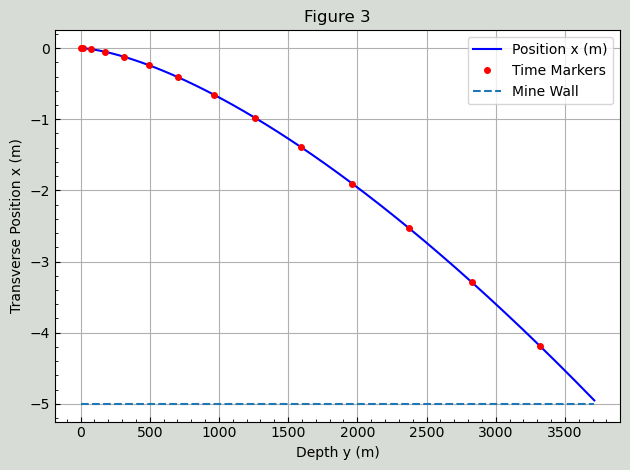

In [6]:
alpha = 0. # Assuming no drag
gamma = 2

omega = np.array([0, 0, rot_eq]) # rad/s


def gr(r):
    u = g0*(r/R_e)
    return u

t0, tf = 0, 1000
t_span = np.linspace(t0, tf, 2000)


# Thing 1: Derivative's function
def coriolis(t, s):
    #if len(s) !=5:
    #    rais ArgumentError(
    # t is independent variable
    # s is the 'state', an array of the dependent variables
    r = s[0:3] # First three element of state vector are 'position'
    v = s[3:6]

    drdt = v
    dvdtx = -2*np.cross(omega, v)[0]
    dvdtz = -2*np.cross(omega, v)[2]
    dvdty = -gr(-np.linalg.norm(r) + R_e) -2*np.cross(omega, v)[1] + alpha*np.abs(v[1])**gamma
    dvdt = np.array([dvdtx, dvdty, dvdtz])
    return np.concatenate((drdt, dvdt))

# Thing 3: Initial conditions
ics = [0, 0, 0, 0, 0, 0]

# Solve

def difference(t, s):
    return s[0] + 5

difference.terminal = True

soln = solve_ivp(fun = coriolis, t_span=(t0,tf), y0=ics, t_eval=t_span, events = difference)

# plot up
tt = soln.t
yx = soln.y[0]
yy = soln.y[1]
yz = soln.y[2]
vx = soln.y[3]
vy = soln.y[4]
vz = soln.y[5]
#%matplotlib widget
increment = 4
indices = np.arange(0, len(tt), increment)
print(indices)
#print(gr(-np.linalg.norm([yx, yy, yz], axis = 0) + R_e)) # Checking to see if linalg worked correctly

fig, ax = plt.subplots()
ax.plot(-yy, yx, label = 'Position x (m)', color = 'blue')
ax.plot(-yy[indices], yx[indices], ls = '', marker = 'o', color  = 'red', zorder = 2, ms = 4, label = 'Time Markers')
ax.set_ylabel('Transverse Position x (m)')
ax.set_xlabel('Depth y (m)')
ax.set_title('Figure 3')
ax.hlines(y = -5, xmin = 0, xmax = np.max(-yy), ls = '--', label = 'Mine Wall')
ax.legend()
ax.grid()
ax.minorticks_on() # Making it 'look nice'
ax.tick_params(axis='both', which='major', direction='in')
ax.tick_params(axis='both', which='minor', direction='in')
fig.set_facecolor('xkcd:light grey')
fig.tight_layout()

# Using events to calculate time at which the mass hits the bottom of the shaft
print(f'Crash into wall occurs at t = {soln.t_events[0][0]} seconds, at y = {soln.y_events[0][0][1]} m')
print(soln.y_events[0][0][1])

We can see that the test mass hits the wall before it reaches the bottom of the well at depth of approximately 3800m.

Now with drag on...

[  0   4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68
  72  76  80  84  88  92  96 100 104 108 112 116 120 124 128 132 136 140
 144 148 152 156 160 164]
Crash occurs at t = 83.49550263720676 seconds, at y = -4000.0000000000005 m
-4000.0000000000005


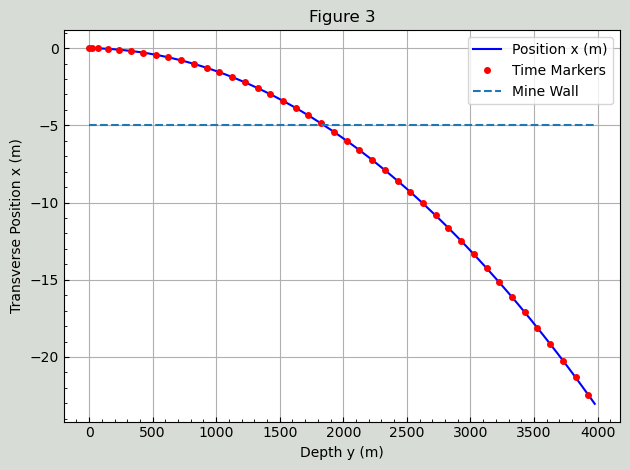

In [7]:
alpha = 0.003919 # Assuming no drag
gamma = 2

omega = np.array([0, 0, rot_eq]) # rad/s


def gr(r):
    u = g0*(r/R_e)
    return u

t0, tf = 0, 1000
t_span = np.linspace(t0, tf, 2000)


# Thing 1: Derivative's function
def coriolis(t, s):
    #if len(s) !=5:
    #    rais ArgumentError(
    # t is independent variable
    # s is the 'state', an array of the dependent variables
    r = s[0:3] # First three element of state vector are 'position'
    v = s[3:6]

    drdt = v
    dvdtx = -2*np.cross(omega, v)[0]
    dvdtz = -2*np.cross(omega, v)[2]
    dvdty = -gr(-np.linalg.norm(r) + R_e) -2*np.cross(omega, v)[1] + alpha*np.abs(v[1])**gamma
    dvdt = np.array([dvdtx, dvdty, dvdtz])
    return np.concatenate((drdt, dvdt))

# Thing 3: Initial conditions
ics = [0, 0, 0, 0, 0, 0]

# Solve

def difference(t, s):
    return s[1] + 4000

difference.terminal = True

soln = solve_ivp(fun = coriolis, t_span=(t0,tf), y0=ics, t_eval=t_span, events = difference)

# plot up
tt = soln.t
yx = soln.y[0]
yy = soln.y[1]
yz = soln.y[2]
vx = soln.y[3]
vy = soln.y[4]
vz = soln.y[5]
#%matplotlib widget
increment = 4
indices = np.arange(0, len(tt), increment)
print(indices)
#print(gr(-np.linalg.norm([yx, yy, yz], axis = 0) + R_e)) # Checking to see if linalg worked correctly

fig, ax = plt.subplots()
ax.plot(-yy, yx, label = 'Position x (m)', color = 'blue')
ax.plot(-yy[indices], yx[indices], ls = '', marker = 'o', color  = 'red', zorder = 2, ms = 4, label = 'Time Markers')
ax.set_ylabel('Transverse Position x (m)')
ax.set_xlabel('Depth y (m)')
ax.set_title('Figure 3')
ax.hlines(y = -5, xmin = 0, xmax = np.max(-yy), ls = '--', label = 'Mine Wall')
ax.legend()
ax.grid()
ax.minorticks_on() # Making it 'look nice'
ax.tick_params(axis='both', which='major', direction='in')
ax.tick_params(axis='both', which='minor', direction='in')
fig.set_facecolor('xkcd:light grey')
fig.tight_layout()

# Using events to calculate time at which the mass hits the bottom of the shaft
print(f'Crash occurs at t = {soln.t_events[0][0]} seconds, at y = {soln.y_events[0][0][1]} m')
print(soln.y_events[0][0][1])

As we can see, air resistance allows the mass more time to hit the side of the wall, which occures at approximately 1800m of depth.

## 

## Part 4:

Center occurs at t = 1266.5475209727902 seconds, at y = -6378100.0 m, at a velocity of v = -7914.042564159174 m/s
Otherside occurs at t = 2479.2706788704777 seconds, at y = -12743443.8 m


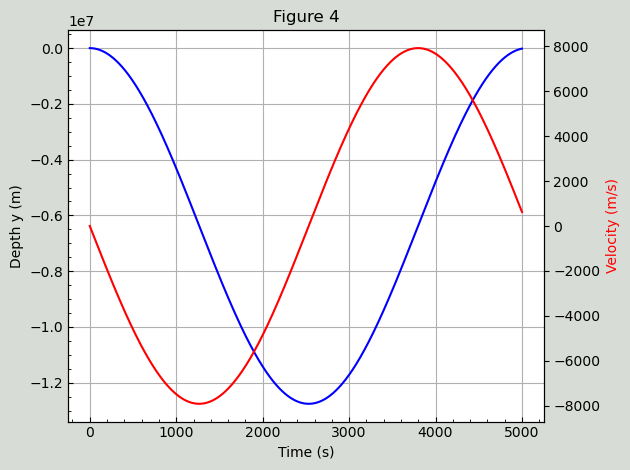

In [8]:
alpha = 0. # Assuming no drag
gamma = 2

omega = np.array([0, 0, 0]) # rad/s


def gr(r):
    u = g0*(r/R_e)
    return u

t0, tf = 0, 5000
t_span = np.linspace(t0, tf, 2000)


# Thing 1: Derivative's function
def model4(t, s):
    #if len(s) !=5:
    #    rais ArgumentError(
    # t is independent variable
    # s is the 'state', an array of the dependent variables
    r = s[0:3] # First three element of state vector are 'position'
    v = s[3:6]

    drdt = v
    dvdtx = -2*np.cross(omega, v)[0]
    dvdtz = -2*np.cross(omega, v)[2]
    dvdty = -gr(-np.linalg.norm(r) + R_e) -2*np.cross(omega, v)[1] + alpha*np.abs(v[1])**gamma
    dvdt = np.array([dvdtx, dvdty, dvdtz])
    return np.concatenate((drdt, dvdt))

# Thing 3: Initial conditions
ics = [0, 0, 0, 0, 0, 0]

# Solve

def difference(t, s):
    return s[1] + R_e

def otherside(t, s):
    return s[1] + 2*R_e*0.999

difference.terminal = False
otherside.terminal = False

soln = solve_ivp(fun = model4, t_span=(t0,tf), y0=ics, t_eval=t_span, atol = 0.2073, events = (difference, otherside))

# plot up
tt = soln.t
yx = soln.y[0]
yy = soln.y[1]
yz = soln.y[2]
vx = soln.y[3]
vy = soln.y[4]
vz = soln.y[5]
#%matplotlib widget

#print(gr(-np.linalg.norm([yx, yy, yz], axis = 0) + R_e)) # Checking to see if linalg worked correctly

fig, ax = plt.subplots()
ax.plot(tt, yy, label = 'Depth (m)', color = 'blue')
ax0 = ax.twinx()
ax0.plot(tt, vy, label = 'Velocity (m/s)', color = 'red')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Depth y (m)')
ax0.set_ylabel('Velocity (m/s)', color = 'red')
ax.set_title('Figure 4')
ax.grid()
ax.minorticks_on() # Making it 'look nice'
ax.tick_params(axis='both', which='major', direction='in')
ax.tick_params(axis='both', which='minor', direction='in')
fig.set_facecolor('xkcd:light grey')
fig.tight_layout()
# Using events to calculate time at which the mass hits the bottom of the shaft
print(f'Center occurs at t = {soln.t_events[0][0]} seconds, at y = {soln.y_events[0][0][1]} m, at a velocity of v = {soln.y_events[0][0][4]} m/s')
print(f'Otherside occurs at t = {soln.t_events[1][0]} seconds, at y = {soln.y_events[1][0][1]} m')

Depth oscillates between the poles, as gravity changes signs when the mass crosses the center of the Earth. 

In [9]:
velocity_cross = np.sqrt(G*M_e/R_e) # m/s
print(velocity_cross)

# a = G * M_e / R_e**2
# recall that v = 2pi/T

Period = 2*np.pi*R_e/velocity_cross # s

print(f'{Period} seconds')
print('This is approximately double the crossing time.')

7905.277129890415
5069.371199675785 seconds
This is approximately double the crossing time.


## Part 5:

24040.044916786497
[  5494.86740955  13737.16852388  24040.04491679 135545.12141863]
----- N = 0 -----
Time to center: 1267.2380430260125 s
Velocity: -7905.906614836245m/s
----- N = 1 -----
Time to center: 1096.5090167736078 s
Velocity: -10461.866860744018m/s
----- N = 2 -----
Time to center: 1035.1940024130197 s
Velocity: -12200.735576753827m/s
----- N = 9 -----
Time to center: 943.9057311050799 s
Velocity: -18386.403906968088m/s


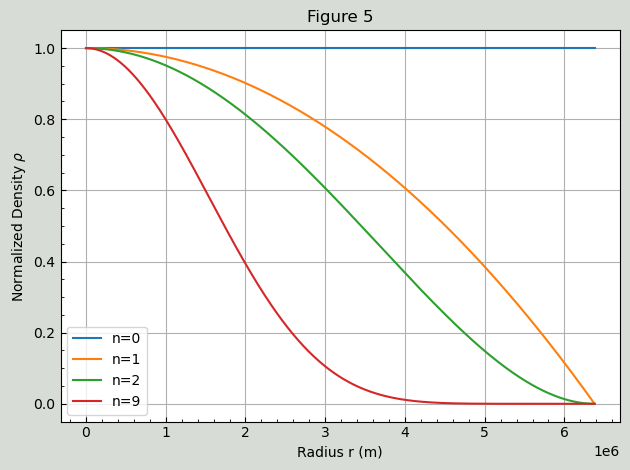

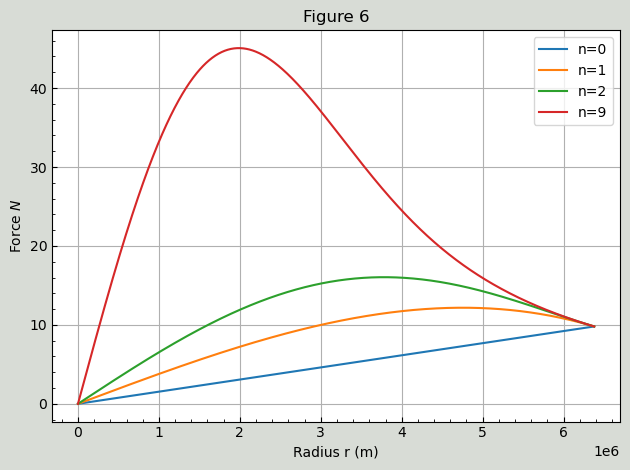

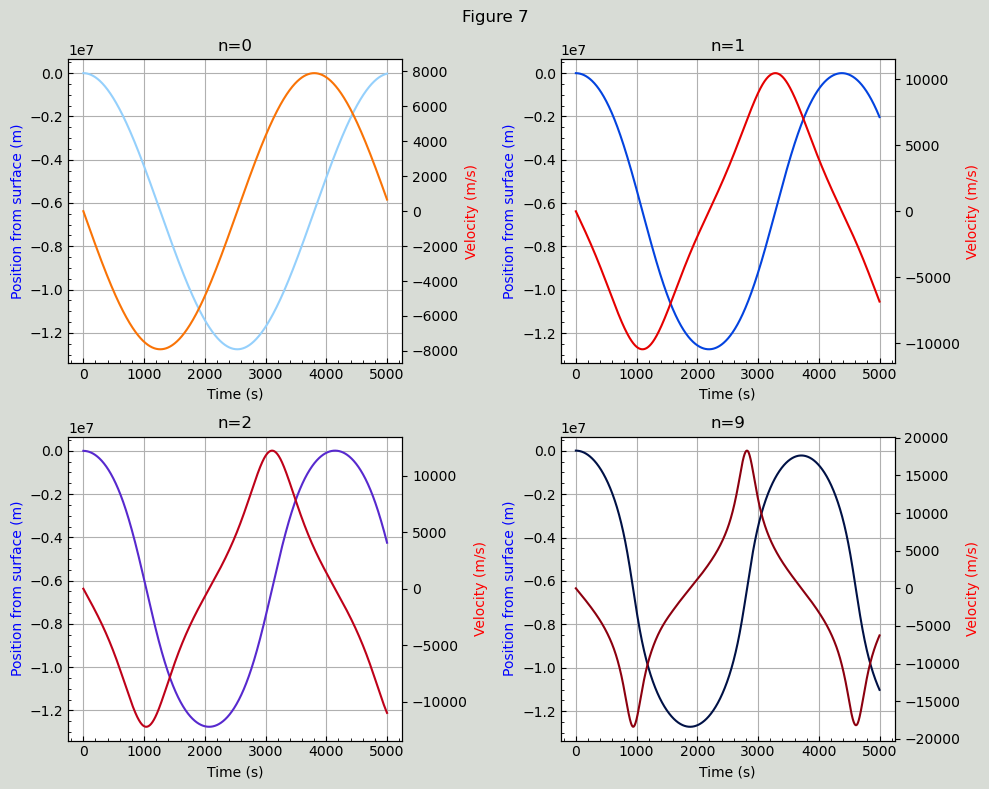

In [13]:
m = 1 # kg
def pint(r, n):
    p = (1 - r**2/R_e**2)**n
    integral_subpn = p*r**2
    return integral_subpn

def p(r, n):
    u = (1 - r**2/R_e**2)**n
    return u

def M_gradient(r, n):
    return 4*np.pi*quad(pint, 0, r, args = (n,))[0]

def gravgradient(r, n):
    return G*M_gradient(r, n)*m/r**2
n_range = 4
n_vals = np.array([0, 1, 2, 9])
p_n = np.zeros(n_range)
rr = np.linspace(1, R_e, 1000)
labels = np.array(['n=0', 'n=1', 'n=2', 'n=9'])
# M = 4*np.pi*p_n*quad(p, 0, R_e)
# M_e/(4*np.pi*quad(p, 0, R_e)) = p_n
forces = [[],[],[],[]]
for i in range(n_range):
    n = n_vals[i]
    integral = quad(pint, 0, R_e, args = (n,))[0]
    p_n[i] = M_e/(4*np.pi*integral)
    for b in rr:
        forces[i].append(gravgradient(b, n)*p_n[i])
print(p_n[2])

fig, ax = plt.subplots()
for i in range(n_range):
    ax.plot(rr, p(rr, n_vals[i]), label = labels[i])
ax.set_ylabel(r'Normalized Density $\rho$')
ax.set_xlabel('Radius r (m)')
ax.set_title('Figure 5')
ax.grid()
ax.minorticks_on() # Making it 'look nice'
ax.tick_params(axis='both', which='major', direction='in')
ax.tick_params(axis='both', which='minor', direction='in')
ax.legend()
fig.set_facecolor('xkcd:light grey')
fig.tight_layout()

fig, ax = plt.subplots()
for i in range(n_range):
    ax.plot(rr, forces[i], label = labels[i])
ax.set_ylabel(r'Force $N$')
ax.set_xlabel('Radius r (m)')
ax.set_title('Figure 6')
ax.grid()
ax.minorticks_on() # Making it 'look nice'
ax.tick_params(axis='both', which='major', direction='in')
ax.tick_params(axis='both', which='minor', direction='in')
ax.legend()
fig.set_facecolor('xkcd:light grey')
fig.tight_layout()

alpha = 0#0.003919 # Assuming no drag
gamma = 2
y0 = 0 # m, surface of the earth
v0 = 0 # m/s, free fall
icon = [y0, v0]


t0, tf = 0, 5000
t_span = np.linspace(t0, tf, 2000)

def rhomodel(t, s):
    y, v = s
    dydt = v
    dvdt = -p_n[i]*gravgradient(y+R_e, n) + alpha*np.abs(v)**gamma
    return [dydt, dvdt]

def difference(t, s):
    return s[0] + R_e

def otherside(t, s):
    return s[0] + 2*R_e*0.999

difference.terminal = False
otherside.terminal = False

# Arrays for future for loop
tts = [[],[],[],[]]
ys = [[],[],[],[]]
vs = [[],[],[],[]]
tevents = [[],[],[],[]]
vevents = [[],[],[],[]]
colors_pos = ['xkcd:light blue','xkcd:blue','xkcd:blue purple','xkcd:navy blue']
colors_vel = ['xkcd:orange','xkcd:red','xkcd:scarlet','xkcd:crimson']
for i in range(n_range):
    n = n_vals[i]
    integral = quad(pint, 0, R_e, args = (n,))[0]
    p_n[i] = M_e/(4*np.pi*integral)
    soln = solve_ivp(fun = rhomodel, t_span=(t0,tf), y0=icon, t_eval=t_span, atol = 0.2073, events = (difference, otherside))
    # Solving
    tts[i] = soln.t
    ys[i] = soln.y[0]
    vs[i] = soln.y[1]
    #print(soln.t_events)
    #print(soln.y_events)
    tevents[i] = soln.t_events[0][0]
    vevents[i] = soln.y_events[0][0][1]
    
fig, ax = plt.subplots(2, 2)

# Depreciated:
'''
ax00 = ax[0][0].twinx()
ax[0][0].plot(tts[0], ys[0], label = f'x, n={n_vals[0]}', color = colors_pos[0])
ax00.plot(tts[0], vs[0], label = f'V, n={n_vals[0]}', color = colors_vel[0])
ax[0][0].set_xlabel('Time (s)')
ax[0][0].set_ylabel('Position from surface (m)', color = 'blue')
ax00.set_ylabel('Velocity (m/s)', color = 'red')
ax[0][0].set_title(f'n={n_vals[0]}')

ax00 = ax[0][1].twinx()
ax[0][1].plot(tts[1], ys[1], label = f'x, n={n_vals[1]}', color = colors_pos[1])
ax00.plot(tts[1], vs[1], label = f'V, n={n_vals[1]}', color = colors_vel[1])
ax[0][1].set_xlabel('Time (s)')
ax[0][1].set_ylabel('Position from surface (m)', color = 'blue')
ax00.set_ylabel('Velocity (m/s)', color = 'red')
ax[0][1].set_title(f'n={n_vals[1]}')

ax00 = ax[1][0].twinx()
ax[1][0].plot(tts[2], ys[2], label = f'x, n={n_vals[2]}', color = colors_pos[2])
ax00.plot(tts[2], vs[2], label = f'V, n={n_vals[2]}', color = colors_vel[2])
ax[1][0].set_xlabel('Time (s)')
ax[1][0].set_ylabel('Position from surface (m)', color = 'blue')
ax00.set_ylabel('Velocity (m/s)', color = 'red')
ax[1][0].set_title(f'n={n_vals[2]}')

ax00 = ax[1][1].twinx()
ax[1][1].plot(tts[3], ys[3], label = f'x, n={n_vals[3]}', color = colors_pos[3])
ax00.plot(tts[3], vs[3], label = f'V, n={n_vals[3]}', color = colors_vel[3])
ax[1][1].set_xlabel('Time (s)')
ax[1][1].set_ylabel('Position from surface (m)', color = 'blue')
ax00.set_ylabel('Velocity (m/s)', color = 'red')
ax[1][1].set_title(f'n={n_vals[3]}')
'''
#Testing flatten() for for loop
#print(ax.flatten())
#print(len(ax.flatten()))

# Using enumerate to index axes in ax.flatten
for di, i in enumerate(ax.flatten()):
    ax00 = i.twinx()
    i.plot(tts[di], ys[di], label = f'x, n={n_vals[di]}', color = colors_pos[di])
    ax00.plot(tts[di], vs[di], label = f'V, n={n_vals[di]}', color = colors_vel[di])
    i.set_xlabel('Time (s)')
    i.set_ylabel('Position from surface (m)', color = 'blue')
    ax00.set_ylabel('Velocity (m/s)', color = 'red')
    i.set_title(f'n={n_vals[di]}')
    
    i.grid()
    i.minorticks_on() # Making it 'look nice'
    i.tick_params(axis='both', which='major', direction='in')
    i.tick_params(axis='both', which='minor', direction='in')

fig.suptitle('Figure 7')
fig.set_facecolor('xkcd:light grey')
fig.set_figwidth(10)
fig.set_figheight(8)
fig.tight_layout()
# Time to reach center:
print(p_n)
for i in range(n_range):
    print(f'----- N = {n_vals[i]} -----\nTime to center: {tevents[i]} s\nVelocity: {vevents[i]}m/s')

6704.347732364495
16760.86933091123
29331.521329094656
165380.08284540445
[  6704.34773236  16760.86933091  29331.52132909 165380.0828454 ]
----- N = 0 -----
Time to center: 1147.2815572365878 s
Velocity: -1887.0968052368285m/s
----- N = 1 -----
Time to center: 992.6766043522206 s
Velocity: -2496.609149198237m/s
----- N = 2 -----
Time to center: 937.2799296635615 s
Velocity: -2908.6706041430525m/s
----- N = 9 -----
Time to center: 854.3324640404336 s
Velocity: -4374.478511267063m/s


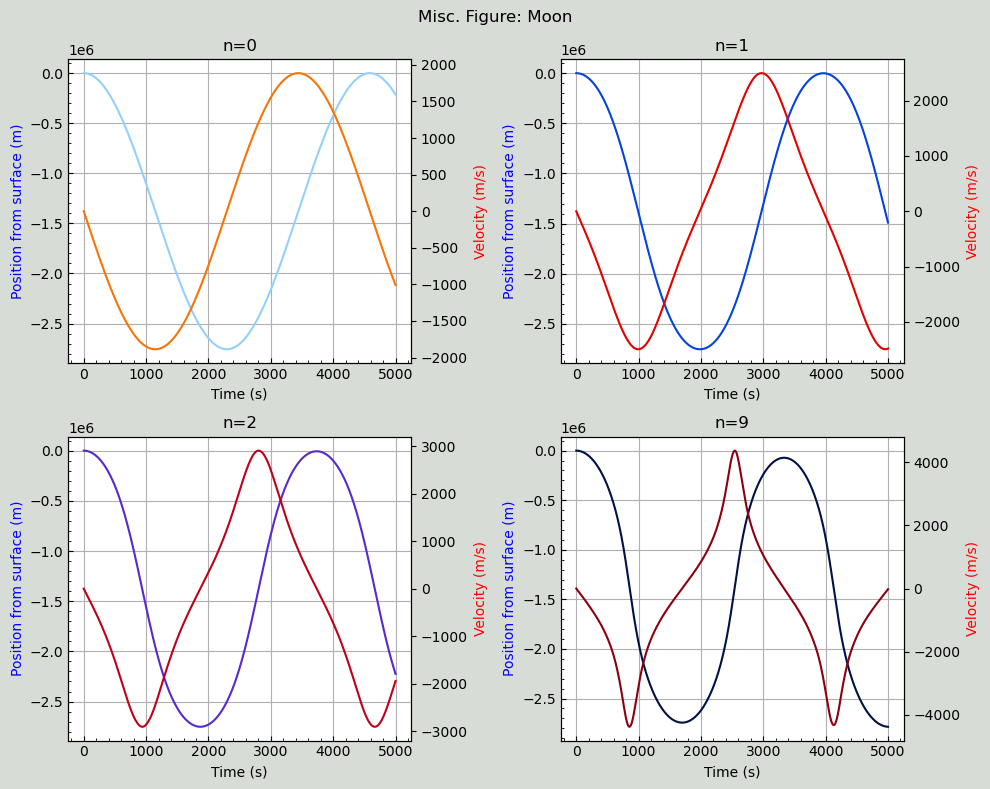

In [15]:
m = 1 # kg
def pint(r, n):
    p = (1 - r**2/R_m**2)**n
    integral_subpn = p*r**2
    return integral_subpn

def p(r, n):
    u = (1 - r**2/R_m**2)**n
    return u

def M_gradient(r, n):
    return 4*np.pi*quad(pint, 0, r, args = (n,))[0]

def gravgradient(r, n):
    return G*M_gradient(r, n)*m/r**2
n_range = 4
n_vals = np.array([0, 1, 2, 9])
#print(p_n)
p_n = np.zeros(n_range)
#print(p_n)
rr = np.linspace(1, R_m, 1000)
labels = np.array(['n=0', 'n=1', 'n=2', 'n=9'])
# M = 4*np.pi*p_n*quad(p, 0, R_e)
# M_e/(4*np.pi*quad(p, 0, R_e)) = p_n

alpha = 0#0.003919 # Assuming no drag
gamma = 2
y0 = 0 # m, surface of the earth
v0 = 0 # m/s, free fall
icon = [y0, v0]

t0, tf = 0, 5000
t_span = np.linspace(t0, tf, 2000)

def rhomodel(t, s):
    y, v = s
    dydt = v
    dvdt = -p_n[i]*gravgradient(y+R_m, n) + alpha*np.abs(v)**gamma
    return [dydt, dvdt]

def difference(t, s):
    return s[0] + R_m

def otherside(t, s):
    return s[0] + 2*R_m*0.999

difference.terminal = False
otherside.terminal = False

# Arrays for future for loop
tts = [[],[],[],[]]
ys = [[],[],[],[]]
vs = [[],[],[],[]]
tevents = [[],[],[],[]]
vevents = [[],[],[],[]]
colors_pos = ['xkcd:light blue','xkcd:blue','xkcd:blue purple','xkcd:navy blue']
colors_vel = ['xkcd:orange','xkcd:red','xkcd:scarlet','xkcd:crimson']
for i in range(n_range):
    n = n_vals[i]
    integral = quad(pint, 0, R_m, args = (n,))[0]
    p_n[i] = M_m/(4*np.pi*integral)
    soln = solve_ivp(fun = rhomodel, t_span=(t0,tf), y0=icon, t_eval=t_span, atol = 0.2073, events = (difference, otherside))
    # Solving
    tts[i] = soln.t
    ys[i] = soln.y[0]
    vs[i] = soln.y[1]
    #print(soln.t_events)
    #print(soln.y_events)
    tevents[i] = soln.t_events[0][0]
    vevents[i] = soln.y_events[0][0][1]
    #print(p_n[i])

fig, ax = plt.subplots(2, 2)

for di, i in enumerate(ax.flatten()):
    ax00 = i.twinx()
    i.plot(tts[di], ys[di], label = f'x, n={n_vals[di]}', color = colors_pos[di])
    ax00.plot(tts[di], vs[di], label = f'V, n={n_vals[di]}', color = colors_vel[di])
    i.set_xlabel('Time (s)')
    i.set_ylabel('Position from surface (m)', color = 'blue')
    ax00.set_ylabel('Velocity (m/s)', color = 'red')
    i.set_title(f'n={n_vals[di]}')
    
    i.grid()
    i.minorticks_on() # Making it 'look nice'
    i.tick_params(axis='both', which='major', direction='in')
    i.tick_params(axis='both', which='minor', direction='in')

fig.suptitle('Misc. Figure: Moon')
fig.set_facecolor('xkcd:light grey')
fig.set_figwidth(10)
fig.set_figheight(8)
fig.tight_layout()
print(p_n)
for i in range(n_range):
    print(f'----- N = {n_vals[i]} -----\nTime to center: {tevents[i]} s\nVelocity: {vevents[i]}m/s')

In [18]:
n = 0
print(M_m/(4*np.pi*quad(pint, 0, R_m, args = (n,))[0]))


6704.347732364495
